# House Prices: Advanced Regression Techniques

### AI TF 머신러닝 과제

* https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
* Predict sales prices and practice feature engineering, RFs, and gradient boosting

### File descriptions

* **input/train.csv** 테스트 셋
* **input/test.csv** 트레인 셋
* **input/data_description.txt** 데이터 설명
* **input/sample_sumbission.csv** 정답 제출 샘플

In [3]:
import pandas as pd

## Load Dataset
데이터를 로드

In [4]:
train = pd.read_csv("input/train.csv") #Train Data Load

print(train.shape) #데이터의 기본 모양 확인  
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test = pd.read_csv("input/test.csv") #Test Data Load

print(train.shape)
test.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Explore

In [9]:
# 차트를 jupyter notebook에 출력해서 보기 위한 명령어
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

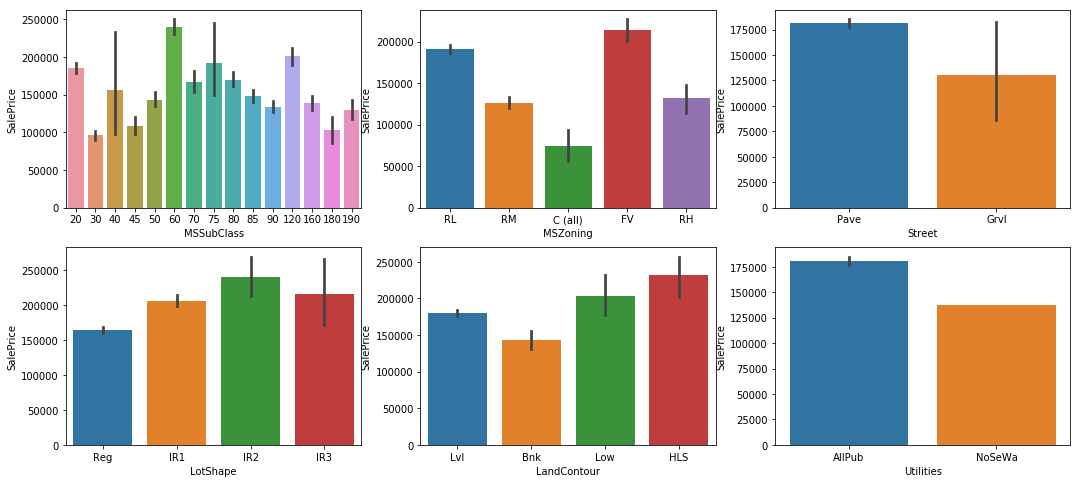

In [10]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="MSSubClass", y="SalePrice", ax=ax1)
sns.barplot(data=train, x="MSZoning", y="SalePrice", ax=ax2)
sns.barplot(data=train, x="Street", y="SalePrice", ax=ax3) # 자갈보다는 포장된 도로일수록 가격이 높다
sns.barplot(data=train, x="LotShape", y="SalePrice", ax=ax4)
sns.barplot(data=train, x="LandContour", y="SalePrice", ax=ax5)
sns.barplot(data=train, x="Utilities", y="SalePrice", ax=ax6) # 활용가능한 것이 많을수록 가격이 높다


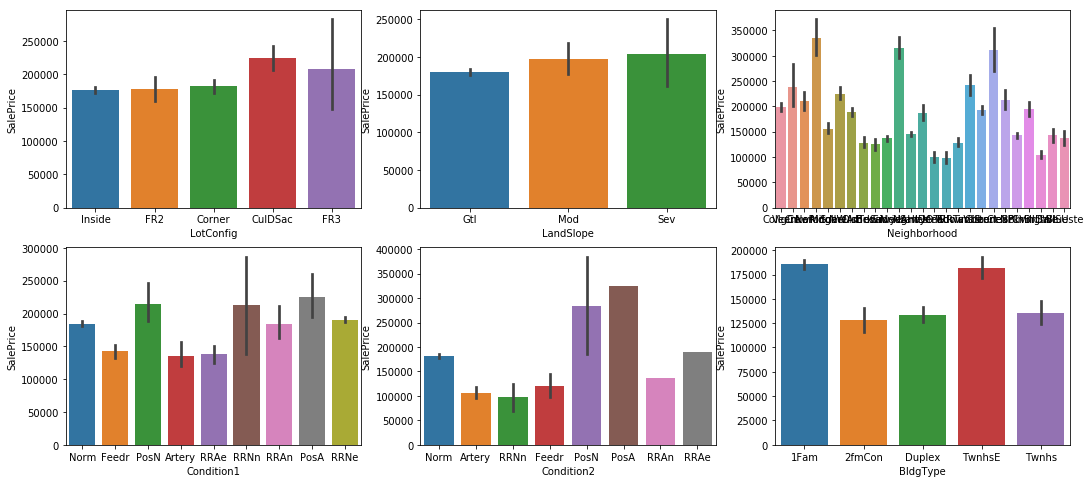

In [11]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="LotConfig", y="SalePrice", ax=ax1) #주거배치가 2Side일 경우 가격이 제일 높다
sns.barplot(data=train, x="LandSlope", y="SalePrice", ax=ax2) # ? 
sns.barplot(data=train, x="Neighborhood", y="SalePrice", ax=ax3) #비싼 도시가 있다
sns.barplot(data=train, x="Condition1", y="SalePrice", ax=ax4) 
sns.barplot(data=train, x="Condition2", y="SalePrice", ax=ax5)
sns.barplot(data=train, x="BldgType", y="SalePrice", ax=ax6) #한가족이 살 수 있는 집이 가격이 제일 높다

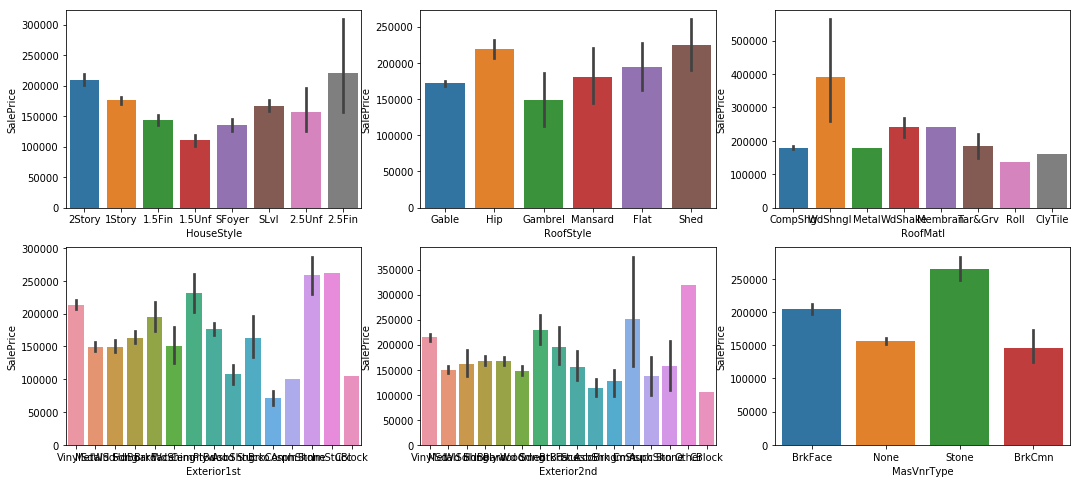

In [12]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="HouseStyle", y="SalePrice", ax=ax1)
sns.barplot(data=train, x="RoofStyle", y="SalePrice", ax=ax2)
sns.barplot(data=train, x="RoofMatl", y="SalePrice", ax=ax3) 
sns.barplot(data=train, x="Exterior1st", y="SalePrice", ax=ax4)
sns.barplot(data=train, x="Exterior2nd", y="SalePrice", ax=ax5)
sns.barplot(data=train, x="MasVnrType", y="SalePrice", ax=ax6)

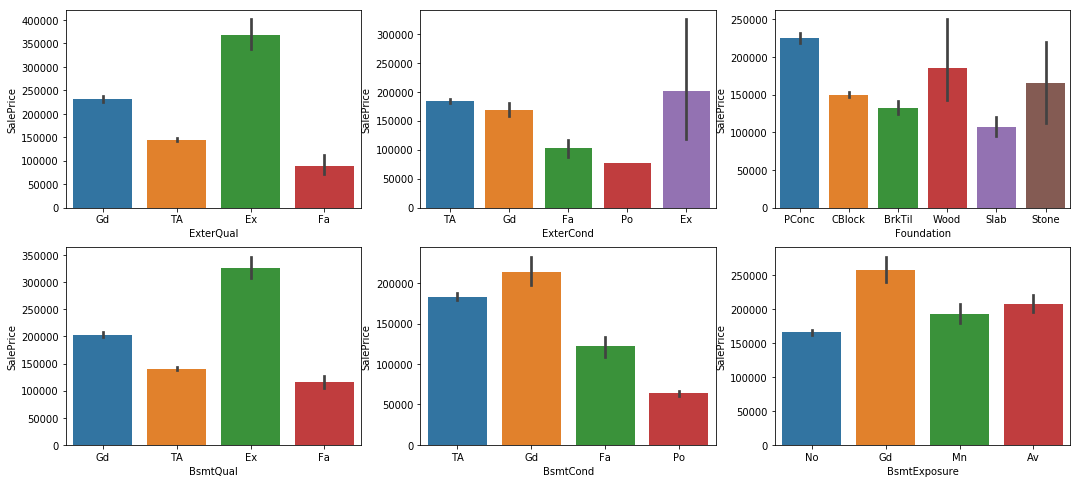

In [13]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="ExterQual", y="SalePrice", ax=ax1) #  외부 소재 평가가 가격에 큰 영향이 있다
sns.barplot(data=train, x="ExterCond", y="SalePrice", ax=ax2) # 외관 상태의 표준편차가 굉장히 크다 
sns.barplot(data=train, x="Foundation", y="SalePrice", ax=ax3) # 일반적으로 비싼 토대와 개인의 취향이 들어간 토대가 있는 것으로 보임
sns.barplot(data=train, x="BsmtQual", y="SalePrice", ax=ax4) # 지하 높이가 가격에 큰 영향이 있다
sns.barplot(data=train, x="BsmtCond", y="SalePrice", ax=ax5) # Ex 어디감 
sns.barplot(data=train, x="BsmtExposure", y="SalePrice", ax=ax6) # 큰 영향이 없어 보임

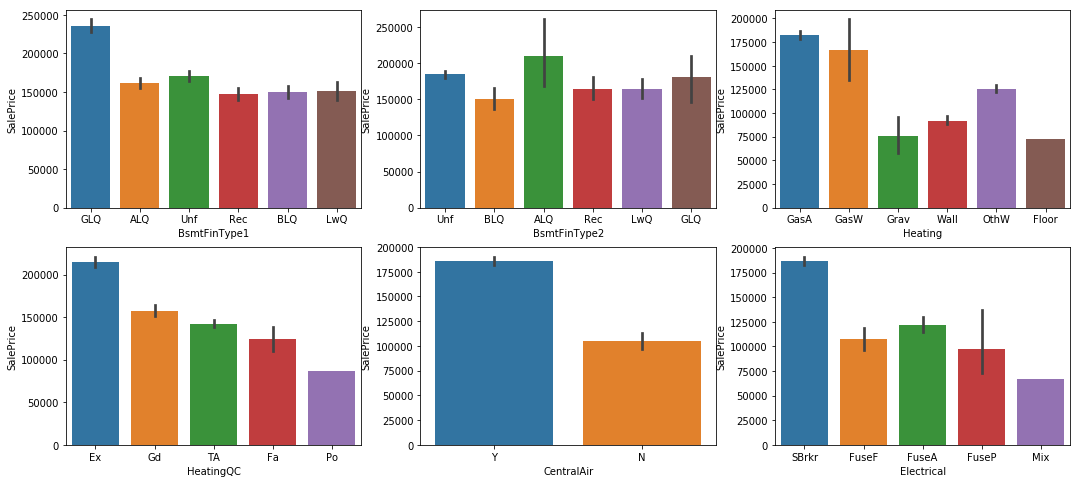

In [14]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="BsmtFinType1", y="SalePrice", ax=ax1)
sns.barplot(data=train, x="BsmtFinType2", y="SalePrice", ax=ax2)
sns.barplot(data=train, x="Heating", y="SalePrice", ax=ax3)
sns.barplot(data=train, x="HeatingQC", y="SalePrice", ax=ax4)
sns.barplot(data=train, x="CentralAir", y="SalePrice", ax=ax5) # 중앙난방일 수록 가격이 비싸다
sns.barplot(data=train, x="Electrical", y="SalePrice", ax=ax6) # 

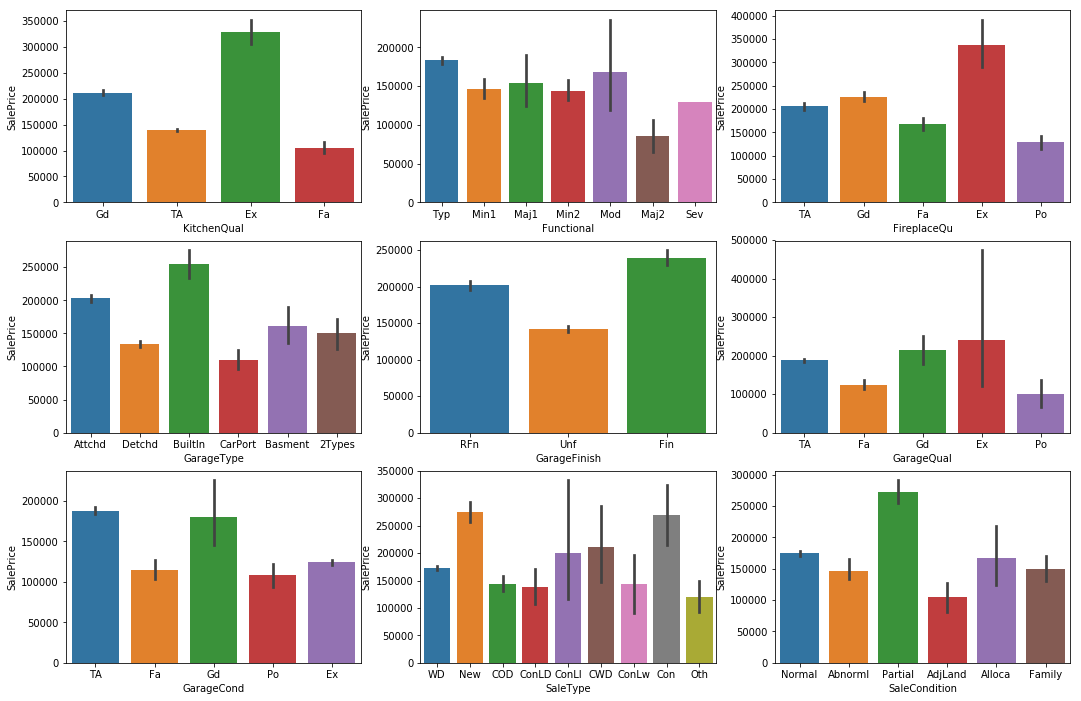

In [15]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(18, 12)

sns.barplot(data=train, x="KitchenQual", y="SalePrice", ax=ax1)
sns.barplot(data=train, x="Functional", y="SalePrice", ax=ax2)
sns.barplot(data=train, x="FireplaceQu", y="SalePrice", ax=ax3)
sns.barplot(data=train, x="GarageType", y="SalePrice", ax=ax4)
sns.barplot(data=train, x="GarageFinish", y="SalePrice", ax=ax5)
sns.barplot(data=train, x="GarageQual", y="SalePrice", ax=ax6)
sns.barplot(data=train, x="GarageCond", y="SalePrice", ax=ax7)
sns.barplot(data=train, x="SaleType", y="SalePrice", ax=ax8)
sns.barplot(data=train, x="SaleCondition", y="SalePrice", ax=ax9)

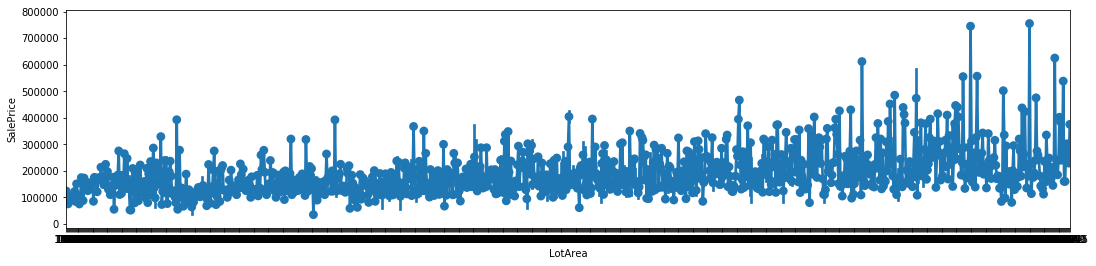

In [16]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="LotArea", y="SalePrice", ax=ax1)

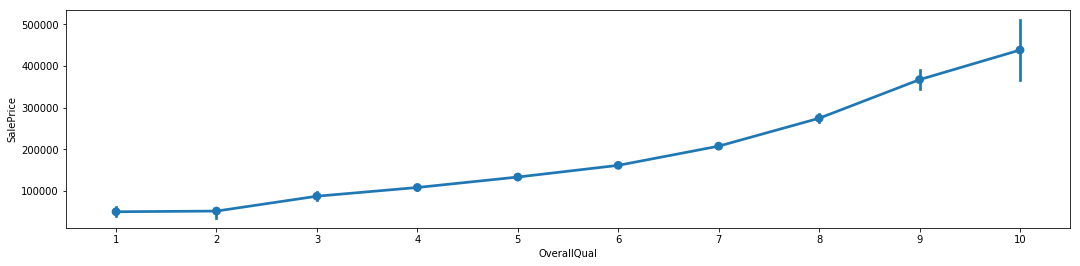

In [17]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="OverallQual", y="SalePrice", ax=ax1)

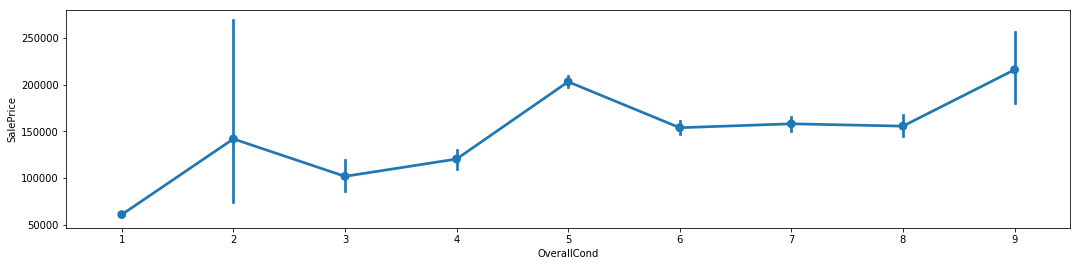

In [18]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="OverallCond", y="SalePrice", ax=ax1)

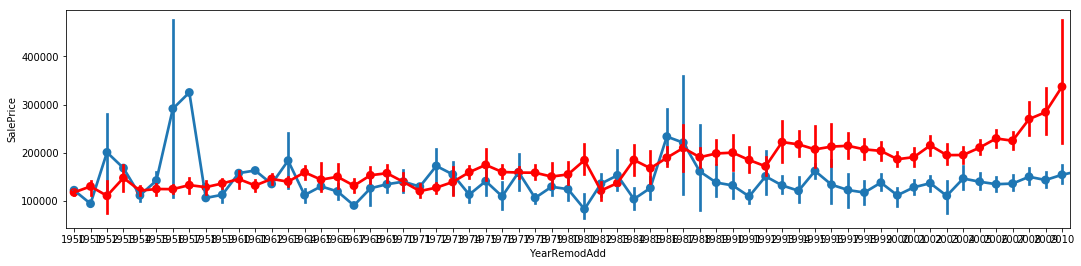

In [19]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="YearBuilt", y="SalePrice", ax=ax1)
sns.pointplot(data=train, x="YearRemodAdd", y="SalePrice", ax=ax1, color='red')

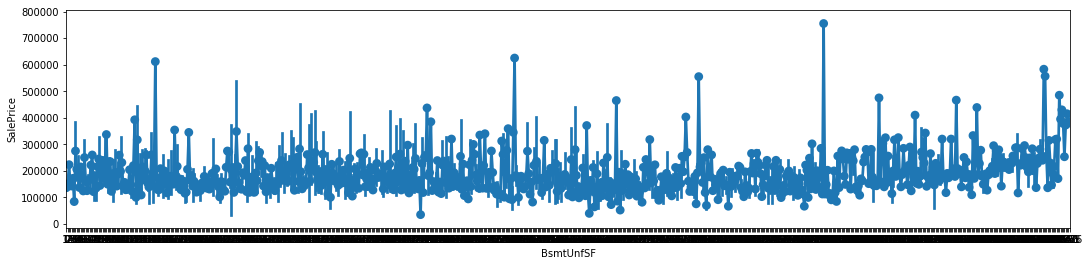

In [20]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="BsmtUnfSF", y="SalePrice", ax=ax1)

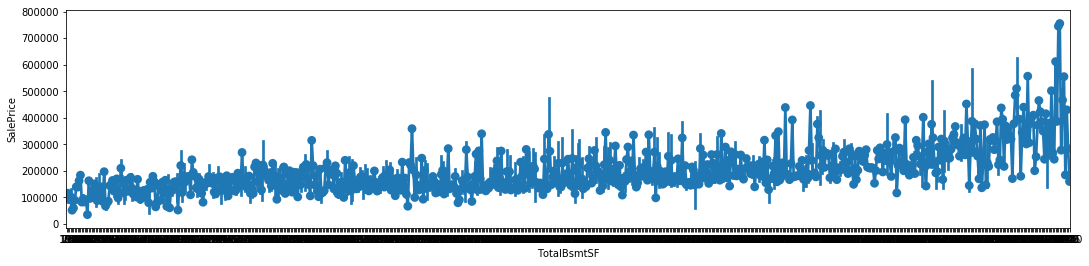

In [21]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="TotalBsmtSF", y="SalePrice", ax=ax1)

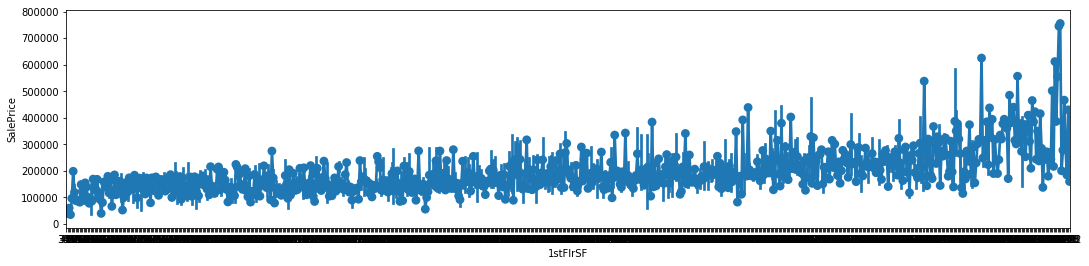

In [22]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="1stFlrSF", y="SalePrice", ax=ax1)

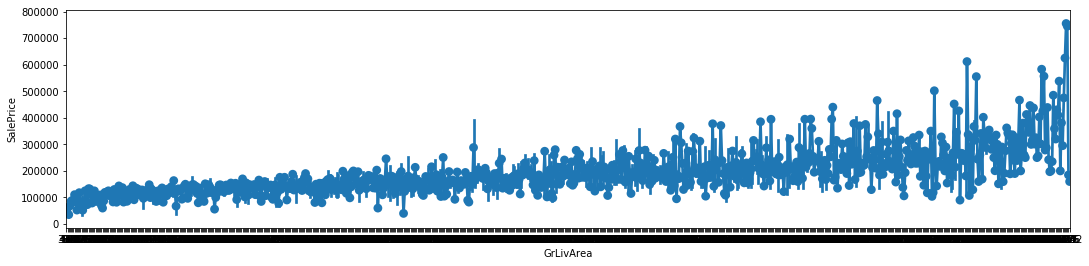

In [23]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="GrLivArea", y="SalePrice", ax=ax1)

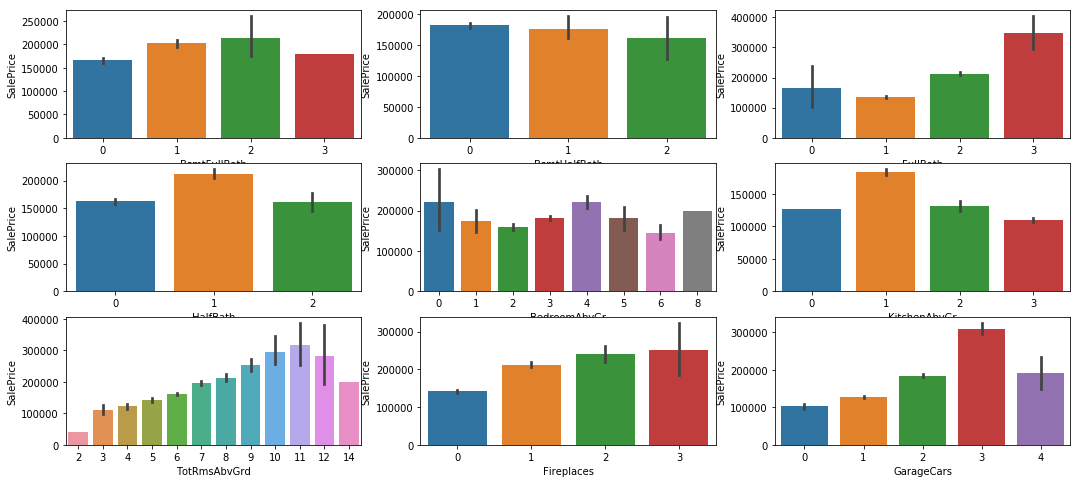

In [24]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="BsmtFullBath", y="SalePrice", ax=ax1)
sns.barplot(data=train, x="BsmtHalfBath", y="SalePrice", ax=ax2)
sns.barplot(data=train, x="FullBath", y="SalePrice", ax=ax3)
sns.barplot(data=train, x="HalfBath", y="SalePrice", ax=ax4)
sns.barplot(data=train, x="BedroomAbvGr", y="SalePrice", ax=ax5)
sns.barplot(data=train, x="KitchenAbvGr", y="SalePrice", ax=ax6)
sns.barplot(data=train, x="TotRmsAbvGrd", y="SalePrice", ax=ax7)
sns.barplot(data=train, x="Fireplaces", y="SalePrice", ax=ax8)
sns.barplot(data=train, x="GarageCars", y="SalePrice", ax=ax9)

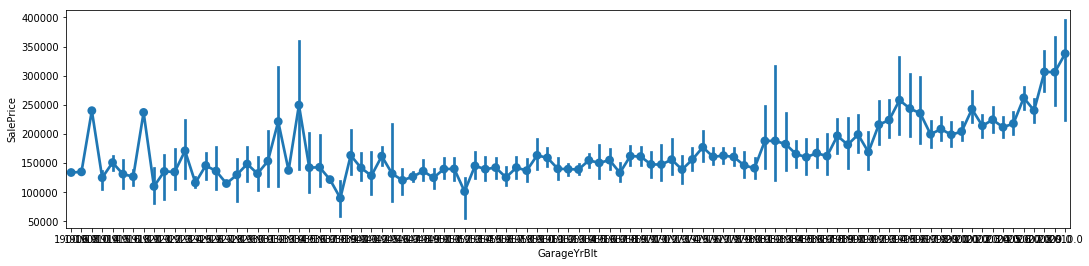

In [25]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="GarageYrBlt", y="SalePrice", ax=ax1)

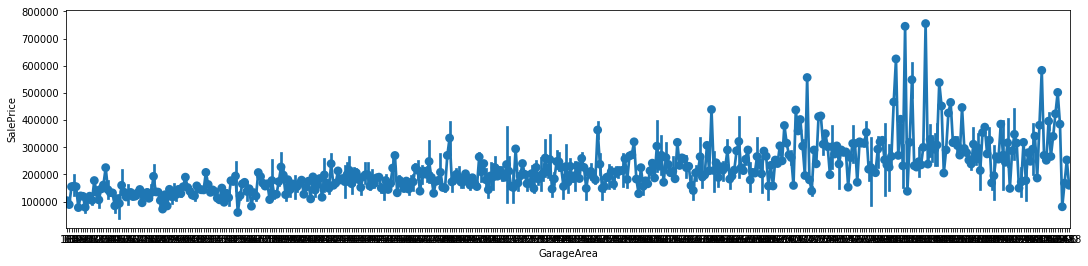

In [26]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="GarageArea", y="SalePrice", ax=ax1)

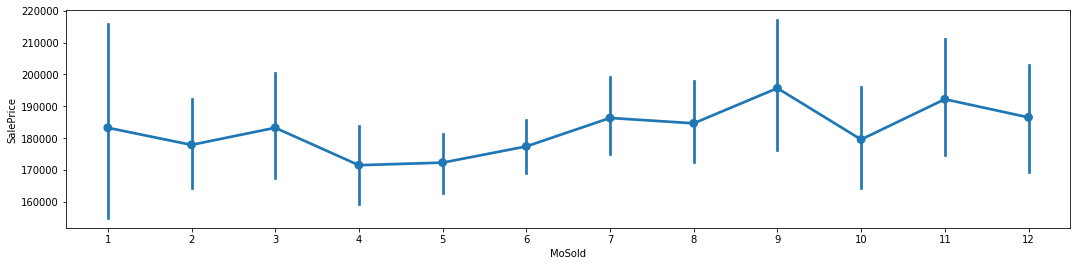

In [27]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="MoSold", y="SalePrice", ax=ax1)

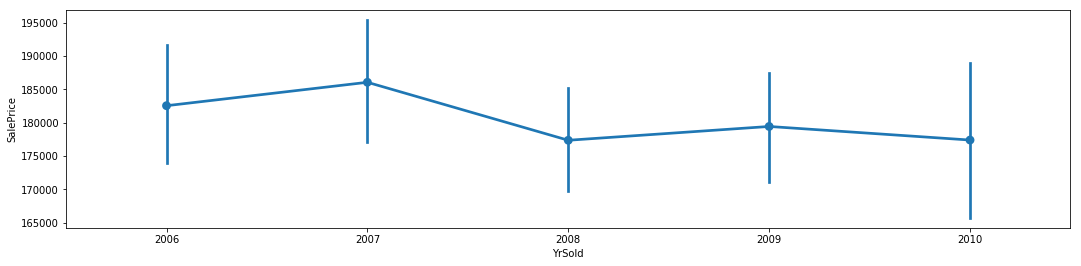

In [28]:
# x축이 서로 연관관계가 있을 경우, 없으면 barplot
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="YrSold", y="SalePrice", ax=ax1)

In [30]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

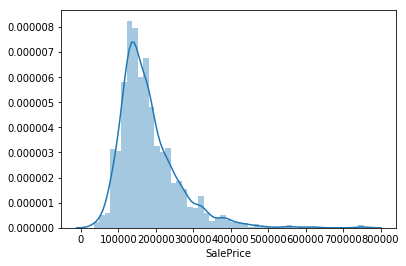

In [32]:
# SalesForce의 값의 분포를 알 수 있다
sns.distplot(train['SalePrice'])

In [36]:
print("Skewness: %f" % train['SalePrice'].skew()) # 삐뚤어짐, 뒤틀림 정도
print("Kurtosis: %f" % train['SalePrice'].kurt()) # 최빈치를 중심으로 뾰족함의 정도

Skewness: 1.882876
Kurtosis: 6.536282


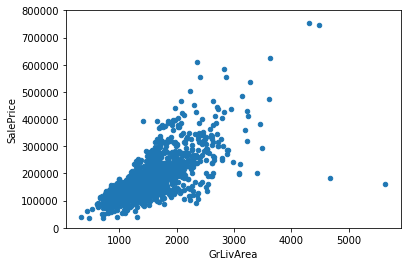

In [39]:
# 지상의 토탈 평수 
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

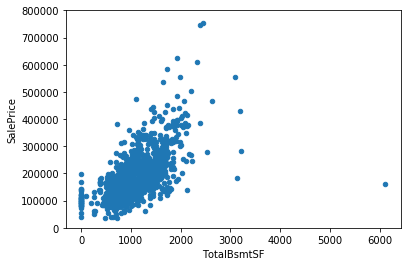

In [42]:
# 지하의 토탈 평수
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

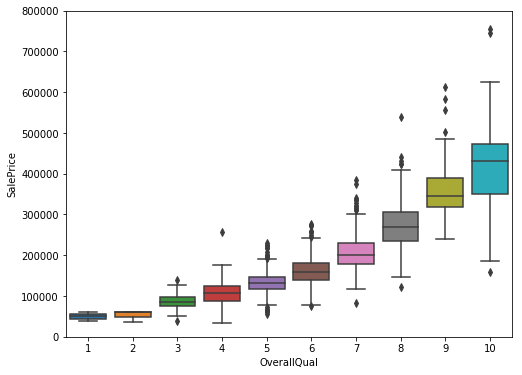

In [44]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

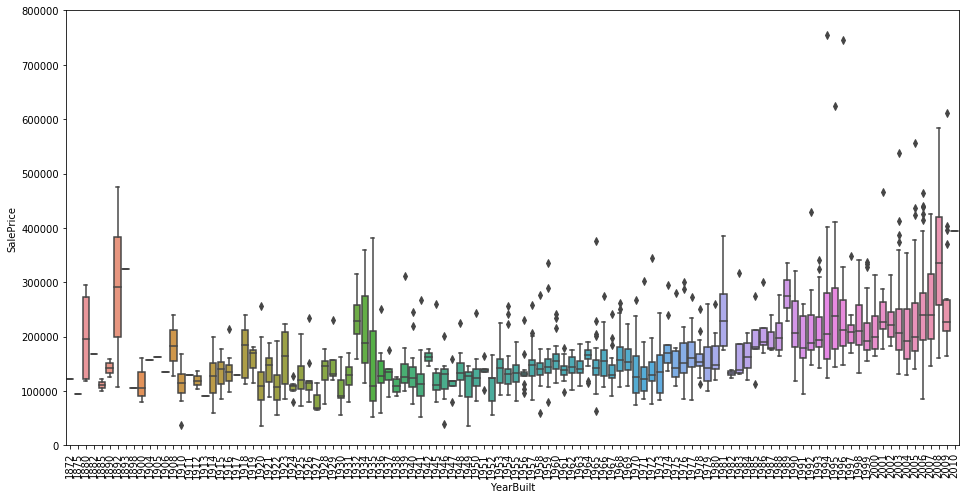

In [46]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


## Preprocessing

## Predict

## Submit (kaggle 제출용)